# Scaling, Inverse Kinematics and Inverse Dynamics

In [1]:
import opensim as osim

In [ ]:
!gdown "1Yx2FnMYRRcass9UEuGeVu1VYtZuzzWC2&confirm=t" # gait2354_simbody.osim

Downloading...
From: https://drive.google.com/uc?id=1Yx2FnMYRRcass9UEuGeVu1VYtZuzzWC2&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/IK&ID/gait2354_simbody.osim
100%|████████████████████████████████████████| 333k/333k [00:00<00:00, 2.95MB/s]


In [3]:
# Load the model.
gait2354 = osim.Model('gait2354_simbody.osim')
print("Name of the model:", gait2354.getName())

[info] Updating Model file from 20303 to latest format...
Name of the model: 3DGaitModel2354
[info] Loaded model 3DGaitModel2354 from file gait2354_simbody.osim
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'femur_r.vtp'.
[warning] Couldn't find file 'tibia_r.vtp'.
[warning] Couldn't find file 'fibula.vtp'.
[warning] Couldn't find file 'talus.vtp'.
[warning] Couldn't find file 'foot.vtp'.
[warning] Couldn't find file 'bofoot.vtp'.
[warning] Couldn't find file 'femur_l.vtp'.
[warning] Couldn't find file 'tibia_l.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'.
[warning] Couldn't find file 'l_bofoot.vtp'.
[warning] Couldn't find file 'hat_spine.vtp'.
[warning] Couldn't find file 'hat_jaw.vtp'.
[warning] Couldn't find file 'hat_skull.vtp'.
[warning] Couldn't find file 'hat_ribs.vtp'.
[info

## Scale the mode

In [4]:
# Configuration file that contains pre-configured settings to scale and register the generic gait2354 musculoskeletal model to the dimensions of a subject for which we have experimental data
!gdown "1sA7Oy1IACT7AC6hugkSgLVG4qextVRXV&confirm=t" # gait2354_Setup_Scale.xml

Downloading...
From: https://drive.google.com/uc?id=1sA7Oy1IACT7AC6hugkSgLVG4qextVRXV&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/IK&ID/gait2354_Setup_Scale.xml
100%|██████████████████████████████████████| 31.2k/31.2k [00:00<00:00, 1.05MB/s]


In [5]:
# MarketSet file which defines the position of the markers used when capturing experimental data
!gdown "1A51LoChvudI4j1Cg_6qj2Kw6e5gEmLT0&confirm=t" # gait2354_Scale_MarkerSet.xml

Downloading...
From: https://drive.google.com/uc?id=1A51LoChvudI4j1Cg_6qj2Kw6e5gEmLT0&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/IK&ID/gait2354_Scale_MarkerSet.xml
100%|██████████████████████████████████████| 55.2k/55.2k [00:00<00:00, 1.10MB/s]


In [6]:
# Marker File that provides information about the position of the markers during the static trial, which is a trial in a known pose and not moving and is a typical trial used for the scaling step
!gdown "1D36gSJWCUR-XgGMN2aQngQSVg9pd5gQf&confirm=t" # subject01_static.trc

Downloading...
From: https://drive.google.com/uc?id=1D36gSJWCUR-XgGMN2aQngQSVg9pd5gQf&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/IK&ID/subject01_static.trc
100%|████████████████████████████████████████| 496k/496k [00:00<00:00, 3.62MB/s]


## Create scale tool

In [7]:
# Create a ScaleTool object using the configuration file.
scale_tool = osim.ScaleTool('gait2354_Setup_Scale.xml')

# Print some information of the config file to test everything is correct.
print("Name:", scale_tool.getName())
print("Subject Mass:", scale_tool.getSubjectMass())
print("Subject Height:", scale_tool.getSubjectHeight())
print("Notes:", scale_tool.getPropertyByName("notes").toString())
print()

# Get model marker file name.
generic_model_maker = scale_tool.getGenericModelMaker()
print("Marker Set File Name:", generic_model_maker.getMarkerSetFileName())
print()

# Get marker file name.
marker_placer = scale_tool.getMarkerPlacer()
print("Marker Placer File Name:", marker_placer.getMarkerFileName())

Name: subject01
Subject Mass: 72.6
Subject Height: 1803.4
Notes: This is an example setup file for scale.exe.

Marker Set File Name: gait2354_Scale_MarkerSet.xml

Marker Placer File Name: subject01_static.trc


In [8]:
scale_tool.run()

True

[info] Processing subject subject01...
[info] Step 1: Loading generic model
[info] Updating Model file from 20303 to latest format...
[info] Loaded model 3DGaitModel2354 from file /home/ubuntu/injury_detection/jupyter_notebooks/IK&ID/gait2354_simbody.osim
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'femur_r.vtp'.
[warning] Couldn't find file 'tibia_r.vtp'.
[warning] Couldn't find file 'fibula.vtp'.
[warning] Couldn't find file 'talus.vtp'.
[warning] Couldn't find file 'foot.vtp'.
[warning] Couldn't find file 'bofoot.vtp'.
[warning] Couldn't find file 'femur_l.vtp'.
[warning] Couldn't find file 'tibia_l.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'.
[warning] Couldn't find file 'l_bofoot.vtp'.
[warning] Couldn't find file 'hat_spine.vtp'.
[warning] Couldn't find file 'hat_jaw.vtp'.
[

## Inverse Kinematics

### Download the configuration file for the Inverse Kinematics tool

In [9]:
# xml configuration file
!gdown "1eA10HYwolFzjHyPGzgOOmC48wK8ExSdS&confirm=t" # subject01_Setup_IK.xml

Downloading...
From: https://drive.google.com/uc?id=1eA10HYwolFzjHyPGzgOOmC48wK8ExSdS&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/IK&ID/subject01_Setup_IK.xml
100%|██████████████████████████████████████| 13.8k/13.8k [00:00<00:00, 28.0MB/s]


In [10]:
# marker file
!gdown "1QvjMuzvU1afgJ9aeCEb1Zgh9XZvo9oz7&confirm=t" # subject01_walk1.trc

Downloading...
From: https://drive.google.com/uc?id=1QvjMuzvU1afgJ9aeCEb1Zgh9XZvo9oz7&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/IK&ID/subject01_walk1.trc
100%|████████████████████████████████████████| 209k/209k [00:00<00:00, 1.89MB/s]


In [11]:
# Create an IK object using the configuration file.
inverse_kinematics_tool = osim.InverseKinematicsTool('subject01_Setup_IK.xml')

# Print some information of the config file to check that everything is correct.
print("Name:", inverse_kinematics_tool.getName())
print("Model File:", inverse_kinematics_tool.get_model_file())
print("Marker File:", inverse_kinematics_tool.get_marker_file())
print("Accuracy:", inverse_kinematics_tool.get_accuracy())
print("Time Range: [", inverse_kinematics_tool.get_time_range(0), ",", inverse_kinematics_tool.get_time_range(1), "]")
print("Constraint Weight:", inverse_kinematics_tool.get_constraint_weight())
print()

# Print weights information
print("Weights:")
task_set = inverse_kinematics_tool.get_IKTaskSet()
for i in range(task_set.getSize()):
  task = task_set.get(i)
  print(task.getName())
  print(task.getWeight())
  print()

Name: subject01
Model File: subject01_simbody.osim
Marker File: subject01_walk1.trc
Accuracy: 1e-05
Time Range: [ 0.4 , 1.6 ]
Constraint Weight: 20.0

Weights:
Sternum
1.0

R.Acromium
0.5

L.Acromium
0.5

Top.Head
0.1

R.ASIS
10.0

L.ASIS
10.0

V.Sacral
10.0

R.Thigh.Upper
1.0

R.Thigh.Front
1.0

R.Thigh.Rear
1.0

R.Shank.Upper
1.0

R.Shank.Front
1.0

R.Shank.Rear
1.0

R.Heel
10.0

R.Midfoot.Sup
1.0

R.Midfoot.Lat
1.0

R.Toe.Lat
1.0

R.Toe.Med
1.0

R.Toe.Tip
10.0

L.Thigh.Upper
1.0

L.Thigh.Front
1.0

L.Thigh.Rear
1.0

L.Shank.Upper
1.0

L.Shank.Front
1.0

L.Shank.Rear
1.0

L.Heel
10.0

L.Midfoot.Sup
1.0

L.Midfoot.Lat
1.0

L.Toe.Lat
1.0

L.Toe.Med
1.0

L.Toe.Tip
10.0

subtalar_angle_r
1000.0

mtp_angle_r
1000.0

subtalar_angle_l
1000.0

mtp_angle_l
1000.0



In [12]:
inverse_kinematics_tool.run()

[info] Loaded model subject01 from file subject01_simbody.osim
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'femur_r.vtp'.
[warning] Couldn't find file 'tibia_r.vtp'.
[warning] Couldn't find file 'fibula.vtp'.
[warning] Couldn't find file 'talus.vtp'.
[warning] Couldn't find file 'foot.vtp'.
[warning] Couldn't find file 'bofoot.vtp'.
[warning] Couldn't find file 'femur_l.vtp'.
[warning] Couldn't find file 'tibia_l.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'.
[warning] Couldn't find file 'l_bofoot.vtp'.
[warning] Couldn't find file 'hat_spine.vtp'.
[warning] Couldn't find file 'hat_jaw.vtp'.
[warning] Couldn't find file 'hat_skull.vtp'.
[warning] Couldn't find file 'hat_ribs.vtp'.

               MODEL: subject01
         coordinates: 23
              forces: 54
           actuators

True

mium)
[info] Frame 55 (t = 0.917):	 total squared error = 0.0130518, marker error: RMS = 0.0205190, max = 0.0771217 (R.Acromium)
[info] Frame 56 (t = 0.933):	 total squared error = 0.012946, marker error: RMS = 0.0204356, max = 0.0762079 (R.Acromium)
[info] Frame 57 (t = 0.95):	 total squared error = 0.0130268, marker error: RMS = 0.0204992, max = 0.0751507 (R.Acromium)
[info] Frame 58 (t = 0.967):	 total squared error = 0.0132767, marker error: RMS = 0.0206949, max = 0.0750855 (R.Acromium)
[info] Frame 59 (t = 0.983):	 total squared error = 0.0135785, marker error: RMS = 0.0209288, max = 0.0758743 (R.Acromium)
[info] Frame 60 (t = 1.0):	 total squared error = 0.0134813, marker error: RMS = 0.0208538, max = 0.0745677 (R.Acromium)
[info] Frame 61 (t = 1.017):	 total squared error = 0.0136118, marker error: RMS = 0.0209545, max = 0.0743050 (R.Acromium)
[info] Frame 62 (t = 1.033):	 total squared error = 0.0138946, marker error: RMS = 0.0211711, max = 0.0739949 (R.Acromium)
[info] Frame 6

## Inverse Dynamics

In [13]:
# configuration file 
!gdown "1aZJmbykxdTrC_Uo9oDO_9xgfTUmLzjpI&confirm=t" # subject01_Setup_InverseDynamics.xml

Downloading...
From: https://drive.google.com/uc?id=1aZJmbykxdTrC_Uo9oDO_9xgfTUmLzjpI&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/IK&ID/subject01_Setup_InverseDynamics.xml
100%|██████████████████████████████████████| 1.65k/1.65k [00:00<00:00, 10.3MB/s]


In [14]:
# external loads file that contains the external loads applied to the model
!gdown "14aOk5udB8pgafettraCZgv3ULnAWzvyI&confirm=t" # subject01_walk1_grf.xml\

Downloading...
From: https://drive.google.com/uc?id=14aOk5udB8pgafettraCZgv3ULnAWzvyI&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/IK&ID/subject01_walk1_grf.xml
100%|██████████████████████████████████████| 2.56k/2.56k [00:00<00:00, 17.7MB/s]


In [15]:
# coordinates file that contains the coordinate data
!gdown "1m0PTgw8K1dW0koHhgn6Wfci0498JsGF-&confirm=t" # subject01_walk1_grf.mot

Downloading...
From: https://drive.google.com/uc?id=1m0PTgw8K1dW0koHhgn6Wfci0498JsGF-&confirm=t
To: /home/ubuntu/injury_detection/jupyter_notebooks/IK&ID/subject01_walk1_grf.mot
100%|████████████████████████████████████████| 224k/224k [00:00<00:00, 2.04MB/s]


In [ ]:
# Create an ID object using the configuration file.
inverse_dynamics_tool = osim.InverseDynamicsTool('subject01_Setup_InverseDynamics.xml')

# Print some information of the config file to check that everything is correct.
print("Name:", inverse_dynamics_tool.getName())
print("Model File:", inverse_dynamics_tool.getModelFileName())
print("External Loads File:", inverse_dynamics_tool.getExternalLoadsFileName())
print("Coordinates File:", inverse_dynamics_tool.getCoordinatesFileName())
print("Time Range: [", inverse_dynamics_tool.getStartTime(), ",", inverse_dynamics_tool.getEndTime(), "]")
print("Lowpass Cutoff Frecuency:", inverse_dynamics_tool.getLowpassCutoffFrequency())
print()

Name: subject01_walk1
Model File: subject01_simbody.osim
External Loads File: subject01_walk1_grf.xml
Coordinates File: subject01_walk1_ik.mot
Time Range: [ 0.4 , 1.6 ]
Lowpass Cutoff Frecuency: 6.0



In [17]:
inverse_dynamics_tool.run()

[info] Loaded model subject01 from file subject01_simbody.osim


True

[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'femur_r.vtp'.
[warning] Couldn't find file 'tibia_r.vtp'.
[warning] Couldn't find file 'fibula.vtp'.
[warning] Couldn't find file 'talus.vtp'.
[warning] Couldn't find file 'foot.vtp'.
[warning] Couldn't find file 'bofoot.vtp'.
[warning] Couldn't find file 'femur_l.vtp'.
[warning] Couldn't find file 'tibia_l.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'.
[warning] Couldn't find file 'l_bofoot.vtp'.
[warning] Couldn't find file 'hat_spine.vtp'.
[warning] Couldn't find file 'hat_jaw.vtp'.
[warning] Couldn't find file 'hat_skull.vtp'.
[warning] Couldn't find file 'hat_ribs.vtp'.

               MODEL: subject01
         coordinates: 23
              forces: 54
           actuators: 54
             muscles: 54
            analyses: 0
         

## Visualize ID results

In [18]:
# Use the TableProcessor to read the motion file.
table = osim.TableProcessor("ResultsInverseDynamics/inverse_dynamics.sto")
# Process the file.
tableID = table.process()
# Print labels for each column.
print(tableID.getColumnLabels())

('pelvis_tilt_moment', 'pelvis_list_moment', 'pelvis_rotation_moment', 'pelvis_tx_force', 'pelvis_ty_force', 'pelvis_tz_force', 'hip_flexion_r_moment', 'hip_adduction_r_moment', 'hip_rotation_r_moment', 'hip_flexion_l_moment', 'hip_adduction_l_moment', 'hip_rotation_l_moment', 'lumbar_extension_moment', 'lumbar_bending_moment', 'lumbar_rotation_moment', 'knee_angle_r_moment', 'knee_angle_l_moment', 'ankle_angle_r_moment', 'ankle_angle_l_moment', 'subtalar_angle_r_moment', 'subtalar_angle_l_moment', 'mtp_angle_r_moment', 'mtp_angle_l_moment')


In [19]:
# Get columns we want to represent, and the independent column (Time).
ankle_angle_r_moment = tableID.getDependentColumn('ankle_angle_r_moment')
ankle_angle_l_moment = tableID.getDependentColumn('ankle_angle_l_moment')
x_time = tableID.getIndependentColumn()

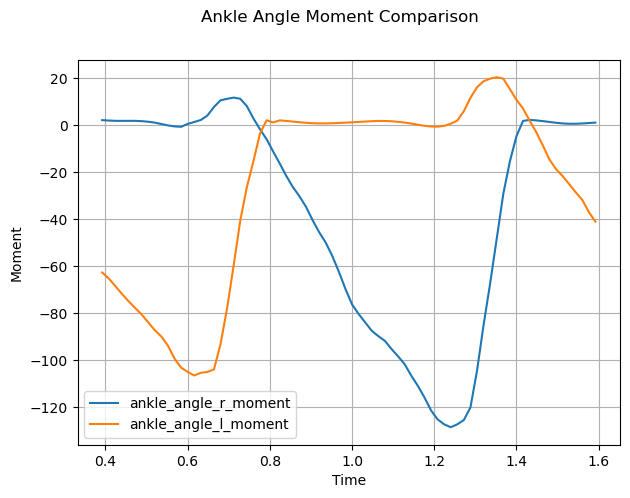

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Create six subplots, with 2 rows and 3 columns.
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
fig.suptitle('Ankle Angle Moment Comparison')

# Plot the knee angles on the first subplot.
axs.plot(x_time, ankle_angle_r_moment.to_numpy(), label='ankle_angle_r_moment')
axs.plot(x_time, ankle_angle_l_moment.to_numpy(), label='ankle_angle_l_moment')
axs.set_xlabel('Time')
axs.set_ylabel('Moment')
axs.grid()
axs.legend()

# Set the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

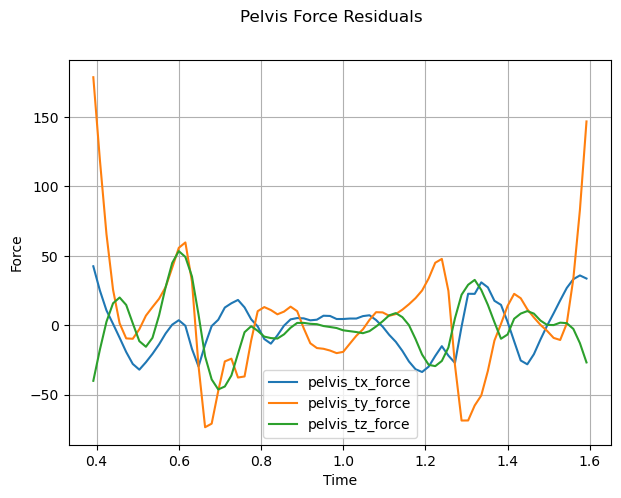

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Get columns we want to represent, and the independent column (Time).
pelvis_tx_force = tableID.getDependentColumn('pelvis_tx_force')
pelvis_ty_force = tableID.getDependentColumn('pelvis_ty_force')
pelvis_tz_force = tableID.getDependentColumn('pelvis_tz_force')
x_time = tableID.getIndependentColumn()

# Create six subplots, with 2 rows and 3 columns.
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
fig.suptitle('Pelvis Force Residuals')

# Plot the knee angles on the first subplot.
axs.plot(x_time, pelvis_tx_force.to_numpy(), label='pelvis_tx_force')
axs.plot(x_time, pelvis_ty_force.to_numpy(), label='pelvis_ty_force')
axs.plot(x_time, pelvis_tz_force.to_numpy(), label='pelvis_tz_force')
axs.set_xlabel('Time')
axs.set_ylabel('Force')
axs.grid()
axs.legend()

# Set the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)